<a href="https://colab.research.google.com/github/arponmandal/Skin_Disease_prediction/blob/main/Skin_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import warnings
warnings.filterwarnings("ignore")
#from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam ,RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
image_width, image_height = 224,224

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      shear_range=0.2,
      zoom_range=0.2,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(
                    "/content/drive/MyDrive/skin_disease23_dataset/train",
                    batch_size=128,
                    class_mode='categorical',
                    shuffle=True,
                    target_size=(image_width, image_height)
)     

test_generator =  test_datagen.flow_from_directory(
                    "/content/drive/MyDrive/skin_disease23_dataset/test",
                    batch_size=128,
                    class_mode='categorical',
                    shuffle=True,
                    target_size=(image_width, image_height)
)

Found 1303 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


In [4]:
train_steps = train_generator.n // train_generator.batch_size

print(train_steps)

10


In [5]:
test_steps = test_generator.n // test_generator.batch_size

print(test_steps)


3


In [6]:
vvg = VGG16(input_shape=(224,224, 3), include_top=False,weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [7]:
vvg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
for layers in (vvg.layers):
    layers.trainable = False

In [9]:
model2 = Sequential()

# Add the vvg convolutional base model
model2.add(vvg)

# Add new layers
model2.add(Flatten())
model2.add(Dense(4096 , activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4096 , activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(2, activation='softmax'))

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 4096)              1

In [10]:
lr = 1e-4
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])

In [11]:
mcp2 = ModelCheckpoint('modelVVG.h5', verbose=1)

In [12]:
es2 = EarlyStopping(patience=2,verbose=1)

In [13]:
history = model2.fit(train_generator,steps_per_epoch=train_steps,epochs=30,validation_data=test_generator,validation_steps=test_steps,verbose=1,callbacks=[mcp2,es2])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.1733 - accuracy: 0.5634 
Epoch 1: saving model to modelVVG.h5
10/10 [==============================] - 302s 30s/step - loss: 1.1733 - accuracy: 0.5634 - val_loss: 0.5667 - val_accuracy: 0.7266
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.7444 - accuracy: 0.5847
Epoch 2: saving model to modelVVG.h5
10/10 [==============================] - 33s 3s/step - loss: 0.7444 - accuracy: 0.5847 - val_loss: 0.5422 - val_accuracy: 0.7240
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.6595 - accuracy: 0.6400
Epoch 3: saving model to modelVVG.h5
10/10 [==============================] - 33s 3s/step - loss: 0.6595 - accuracy: 0.6400 - val_loss: 0.5480 - val_accuracy: 0.7891
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.5940 - accuracy: 0.6826
Epoch 4: saving model to modelVVG.h5
10/10 [==============================] - 34s 3s/step - loss: 0.5940 - accuracy: 0.6826

In [14]:
model2.evaluate(test_generator, verbose=1, steps=test_steps)

3/3 [==============================] - 5s 2s/step - loss: 0.4441 - accuracy: 0.8359


[0.4441152513027191, 0.8359375]

Text(0.5, 1.0, 'Training and validation loss')

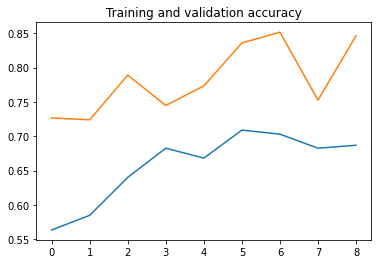

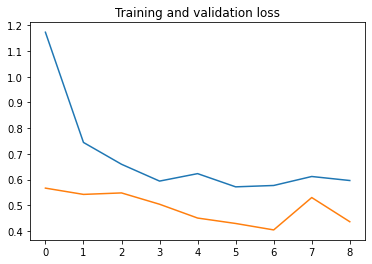

In [15]:
import matplotlib.pyplot as plt

accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy))

plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

image_width, image_height = 224,224

img = image.load_img('/content/drive/MyDrive/skin_disease23_dataset/test/Acne and Rosacea Photos/acne-cystic-61 (1).jpg', target_size=(image_width, image_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img/= 255.
model = load_model('modelVVG.h5')
result = model.predict(img)
train_generator.class_indices
if result[0][0] == 0:
    prediction = 'melanoma'
else:
    prediction = 'acne'
print(prediction)

acne


In [17]:
model.save('modelVVG.h5')